In [1]:
# installing the necessary libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# defining the some static variables to support in our progress
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 80

In [3]:
# Loading the dataset into tensorflow input pipeline
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
    shuffle= True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

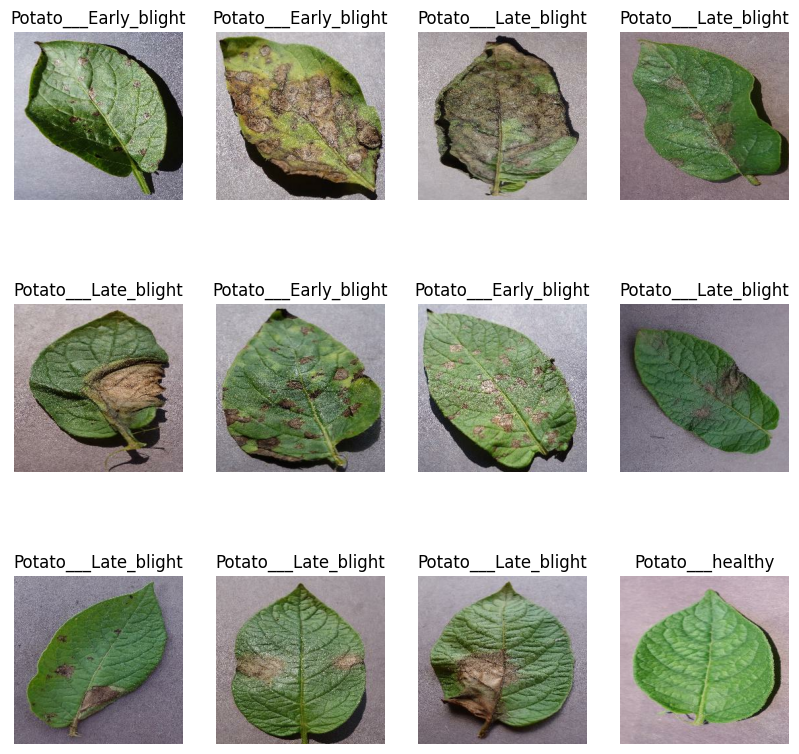

In [6]:
# visualization of data
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

68

In [8]:
# Defining the ratio of  dataset in to training, test and validation 
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds= dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [11]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [14]:
# spliting the dataset
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle= True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds= ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds,test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

54

In [17]:
len(val_ds)

6

In [18]:
len(test_ds)

8

In [19]:
# training, testing and validation of splited dataset
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [20]:
# resizing and rescaling the dataset
    resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
# performining the data augmentation 
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [22]:
# building the CNN algorithm architecture
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

In [23]:
# to investigate the model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [24]:
# compile the potato disease prediction model
model.compile(
optimizer = 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [42]:
# train the network
history = model.fit(
train_ds,
epochs = EPOCHS,
batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
    
)

Epoch 1/80
54/54 [==============================] - 120s 2s/step - loss: 0.8935 - accuracy: 0.5493 - val_loss: 0.8709 - val_accuracy: 0.5573
Epoch 2/80
54/54 [==============================] - 106s 2s/step - loss: 0.7249 - accuracy: 0.7165 - val_loss: 0.4833 - val_accuracy: 0.8438
Epoch 3/80
54/54 [==============================] - 1961s 37s/step - loss: 0.4741 - accuracy: 0.8016 - val_loss: 0.3152 - val_accuracy: 0.9062
Epoch 4/80
54/54 [==============================] - 114s 2s/step - loss: 0.3634 - accuracy: 0.8504 - val_loss: 0.2306 - val_accuracy: 0.9115
Epoch 5/80
54/54 [==============================] - 106s 2s/step - loss: 0.3184 - accuracy: 0.8773 - val_loss: 0.2217 - val_accuracy: 0.9219
Epoch 6/80
54/54 [==============================] - 244s 5s/step - loss: 0.2508 - accuracy: 0.8955 - val_loss: 0.3831 - val_accuracy: 0.8542
Epoch 7/80
54/54 [==============================] - 132s 2s/step - loss: 0.2540 - accuracy: 0.9026 - val_loss: 0.1745 - val_accuracy: 0.9375
Epoch 8/80


Epoch 59/80
54/54 [==============================] - 84s 2s/step - loss: 0.0191 - accuracy: 0.9930 - val_loss: 0.1145 - val_accuracy: 0.9635
Epoch 60/80
54/54 [==============================] - 86s 2s/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0905 - val_accuracy: 0.9740
Epoch 61/80
54/54 [==============================] - 79s 1s/step - loss: 0.0178 - accuracy: 0.9953 - val_loss: 0.4984 - val_accuracy: 0.8906
Epoch 62/80
54/54 [==============================] - 93s 2s/step - loss: 0.0388 - accuracy: 0.9836 - val_loss: 0.0751 - val_accuracy: 0.9792
Epoch 63/80
54/54 [==============================] - 103s 2s/step - loss: 0.0757 - accuracy: 0.9742 - val_loss: 0.1853 - val_accuracy: 0.9323
Epoch 64/80
54/54 [==============================] - 85s 2s/step - loss: 0.0508 - accuracy: 0.9818 - val_loss: 0.0785 - val_accuracy: 0.9688
Epoch 65/80
54/54 [==============================] - 83s 2s/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0363 - val_accuracy: 0.9844
Epoch 66/80


In [43]:
# calulating the total accuracy of model
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 358ms/step - loss: 0.0486 - accuracy: 0.9805


In [45]:
scores

[0.04864482581615448, 0.98046875]

In [47]:
# history parameter of model
history

In [48]:
history.params

{'verbose': 1, 'epochs': 80, 'steps': 54}

In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [57]:
np.argmax([9.993457e-01, 6.538664e-04, 3.059297e-07])

0

First image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 333ms/step
predicted label: Potato___Late_blight


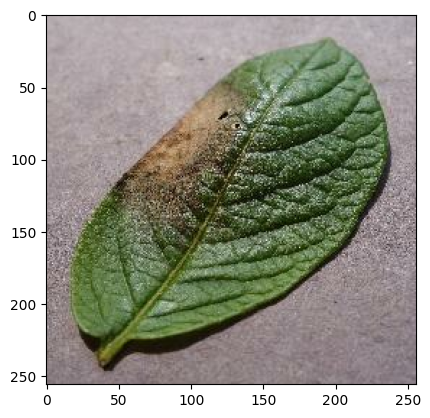

In [56]:
# Predicting the image of potato 
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image =  images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print ("predicted label:", class_names[np.argmax(batch_prediction[0])])
  

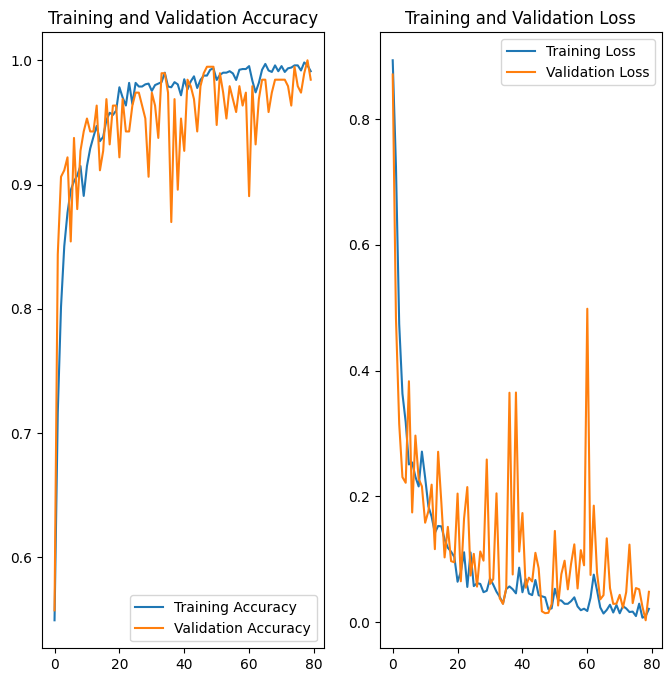

In [58]:
# checking the training and validation accuracy while training the model
plt.figure(figsize = (8,8))
plt.subplot (1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot (1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
# making the prediction 
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 28ms/step


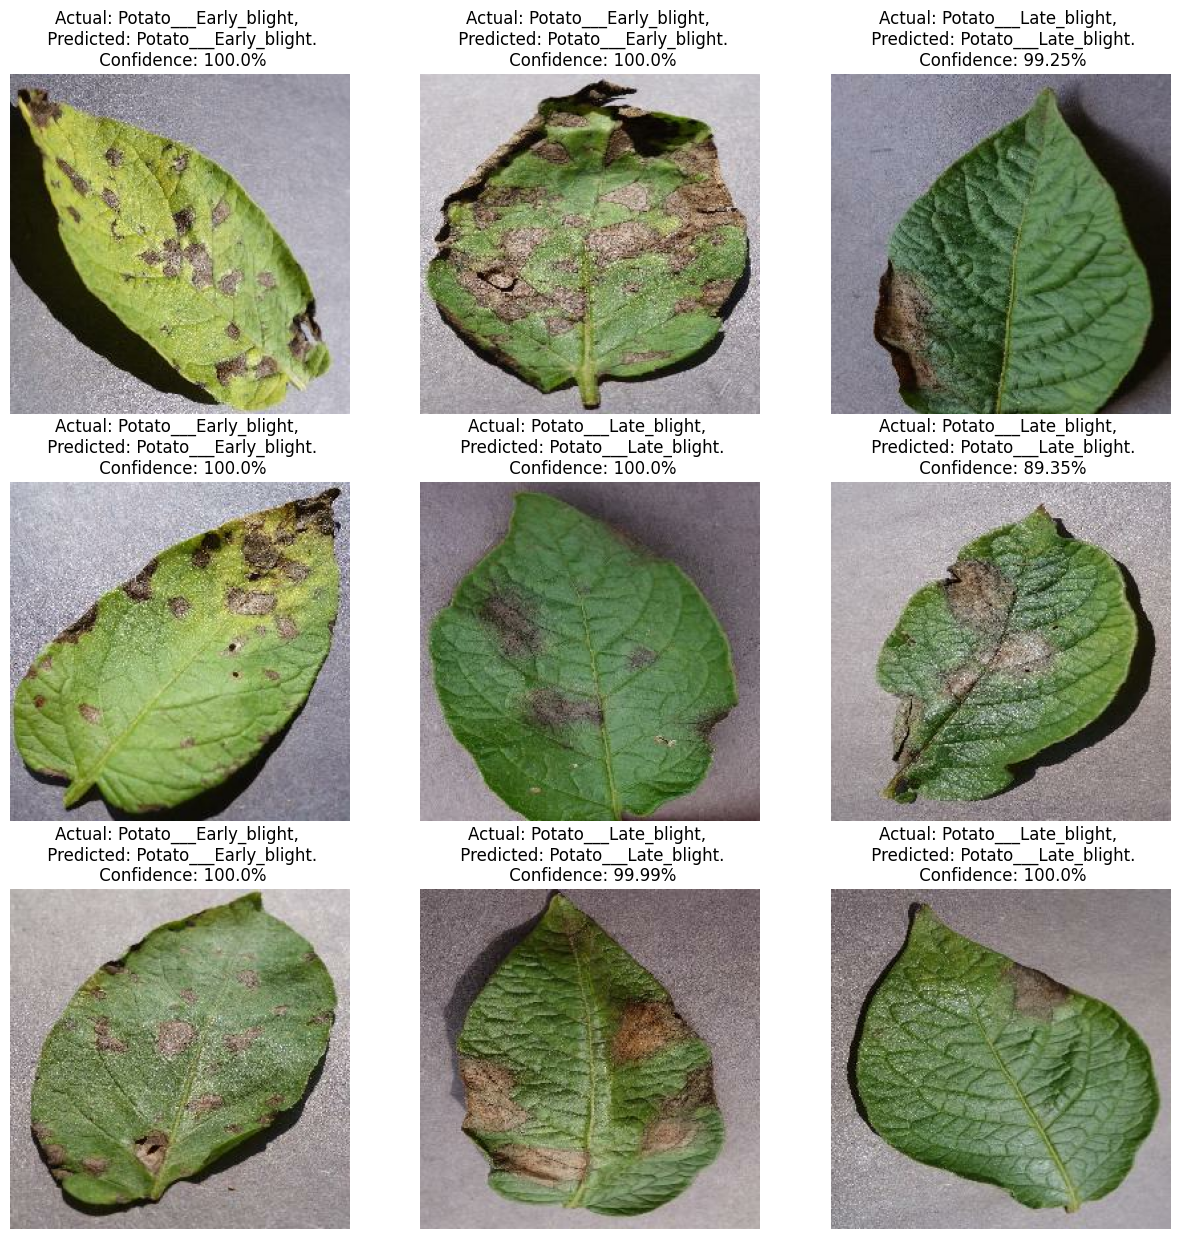

In [38]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        
        plt.axis("off")

In [60]:
# saving the model on disk
model.save("../potatoes.h5")

In [61]:
# saving the model in JSON format
from tensorflow.keras.models import model_from_json
model_in_json= model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_in_json)